In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

In [2]:
# Load dataset
df= pd.read_csv("diabetic_data.csv")

In [3]:
# Data head
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.shape

(101766, 50)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [9]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [10]:
print(df.duplicated().sum())

0


### Dropping the columns

In [3]:
df.drop(['weight','payer_code','encounter_id', 'patient_nbr'],axis=1,inplace=True)

We can replace the missing values in the race column with the most frequent value, and replace the missing values in the medical_specialty column with the string "missing".

### Replacing the missing values

In [6]:
# Replace missing values in the race column with the most frequent value
df['race'] = df['race'].fillna(df['race'].mode()[0])

# Replace missing values in the medical_specialty column with "missing"
df['medical_specialty'] = df['medical_specialty'].fillna('missing')

### Converting the categorical variables to the appropriate data type: 
Some columns like 'race', 'gender', 'age', and 'readmitted' contain categorical data. We can convert these columns to the appropriate data type using the astype() method

In [7]:
# Convert categorical variables to appropriate data type
cat_cols = ['race', 'gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
df[cat_cols] = df[cat_cols].astype('category')

Clean the age column: The age column contains values in the format 'X-Y', where X and Y represent the lower and upper bounds of the age group. We can convert this column to a numerical column by taking the average of the age group.


In [8]:
import re #regex!

# Define a function to clean the age column
def clean_age(age):
    age = str(age) # Convert to string
    age = re.sub('[^0-9\-]', '', age) # Remove any non-numeric characters
    age = age.split('-') # Split the string into a list of values
    age = [int(x) for x in age if x != ''] # Convert each value to an integer and remove any empty strings
    if len(age) == 1:
        return age[0]
    else:
        return sum(age)/2 # Return the average of the lower and upper bounds of the age group

# Apply the clean_age function to the age column
df['age'] = df['age'].apply(clean_age)

In [9]:
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-110']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, include_lowest=True)


<AxesSubplot:xlabel='age', ylabel='Count'>

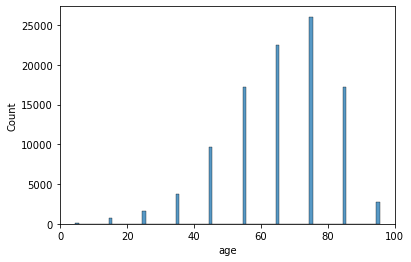

In [10]:
sns.histplot(x="age", data=df)

Combine the diagnosis codes: The diagnosis codes in columns 'diag_1', 'diag_2', and 'diag_3' are in different formats. We can convert these codes to a common format and then combine them into a single column.


In [11]:
# Combine the diagnosis codes
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', np.nan) # Replace '?' with NaN
    df[col] = pd.to_numeric(df[col], errors='coerce') # Convert the column to a numerical column
    df.loc[(df[col] >= 390) & (df[col] < 400), col] = 1 # Circulatory system
    df.loc[(df[col] >= 401) & (df[col] < 410), col] = 2 # Respiratory system
    df.loc[(df[col] >= 410) & (df[col] < 460) | (df[col] == 785), col] = 3 # Digestive system
    df.loc[(df[col] >= 460) & (df[col] < 520) | (df[col] == 786), col] = 4 # Musculoskeletal system
    df.loc[(df[col] >= 520) & (df[col] < 580) | (df[col] == 787), col] = 5 # Genitourinary system
    df.loc[(df[col] >= 580) & (df[col] < 630) | (df[col] == 788), col] = 6 # Neoplasms
    df.loc[(df[col] >= 800) & (df[col] < 1000), col] = 7 # Injury and poisoning
    df.loc[(df[col] >= 710) & (df[col] < 740), col] = 8 # Congenital anomalies
    df.loc[(df[col] >= 140) & (df[col] < 240), col] = 9 # Other
    df.loc[(df[col] >= 240) & (df[col] < 280), col] = 10 # Other
    df.loc[(df[col] >= 680) & (df[col] < 710) | (df[col] >= 782) & (df[col] < 784) | (df[col] >= 790) & (df[col] < 800) | (df[col] >= 240) & (df[col] < 250), col] = 11 # Other
    df[col] = df[col].astype('category') # Convert the column to a categorical column


In [12]:
df['medical_specialty'].replace('?', np.nan, inplace=True)
df['medical_specialty'].tail()

101761                NaN
101762                NaN
101763                NaN
101764    Surgery-General
101765                NaN
Name: medical_specialty, dtype: object

## Outlier dedection:
To find the percentage of outliers for the numerical columns in the dataset, we can use the Interquartile Range (IQR) method. Here's the code to calculate the percentage of outliers

## percentage of outliers present in numerical cols

In [13]:
num_cols = [ 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

# Find the percentage of outliers for each numerical column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum() / len(df) * 100
print("percentage of outliers present in numerical cols are:\n", outliers)

percentage of outliers present in numerical cols are:
 time_in_hospital       2.212920
num_lab_procedures     0.140518
num_procedures         4.868031
num_medications        2.512627
number_outpatient     16.448519
number_emergency      11.185465
number_inpatient       6.926675
number_diagnoses       0.276124
dtype: float64


## Impute missing values: mode imputation

In [14]:
# Replace missing values in the 'medical_specialty' column with the mode of the column
df['medical_specialty'] = df['medical_specialty'].fillna(df['medical_specialty'].mode()[0])

## Feature engineering:

In [15]:
# Create a binary feature indicating whether a patient has been readmitted
df['readmitted_binary'] = np.where(df['readmitted'] == 'NO', '0', '1')

# Create a feature indicating the total number of diagnoses for each patient
df['total_diagnoses'] = df['number_diagnoses'] + df['number_outpatient'] + df['number_emergency'] + df['number_inpatient']

In [16]:
# Age binning: Binning age into different age groups
bins = [0, 18, 40, 60, 100]
labels = ['Teenager', 'Young Adult', 'Middle-aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

<AxesSubplot:xlabel='readmitted', ylabel='count'>

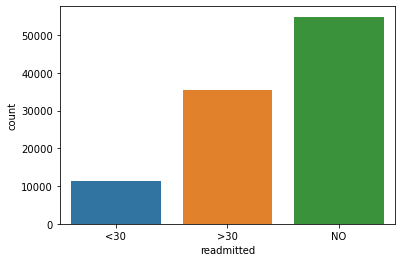

In [17]:
sns.countplot(x="readmitted", data=df)

This will give us an idea of the distribution of the target variable and the imbalance in the dataset.

<AxesSubplot:xlabel='readmitted', ylabel='count'>

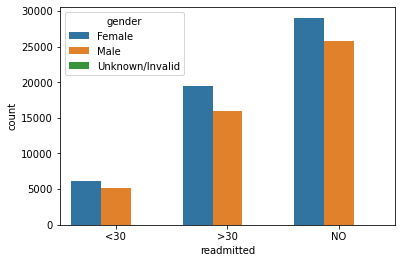

In [18]:
sns.countplot(x="readmitted", hue="gender", data=df)

This will give us an idea of how the target variable is distributed across different values of the "gender" feature.

This will give us an idea of the strength and direction of the linear relationships between the numerical features in the dataset.

#### 1. Explore Categorical Features:
We can explore the distribution of categorical features like race, gender, admission_type_id, discharge_disposition_id, and admission_source_id, etc. using countplots.

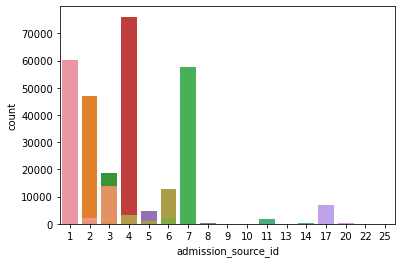

In [19]:
# Assuming 'df' is the DataFrame you want to use
variables_to_plot = ["race", "gender", "admission_type_id", "discharge_disposition_id", "admission_source_id"]

for variable in variables_to_plot:
    sns.countplot(x=variable, data=df)


#### 2.Age Distribution:
We can explore the distribution of the age feature using a histogram or a boxplot.

<AxesSubplot:xlabel='age', ylabel='Count'>

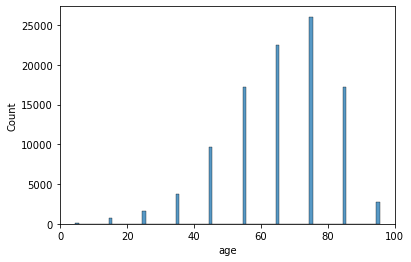

In [20]:
sns.histplot(x="age", data=df)

#### 3. Relationship between numerical features:
We can explore the relationship between numerical features using scatterplots

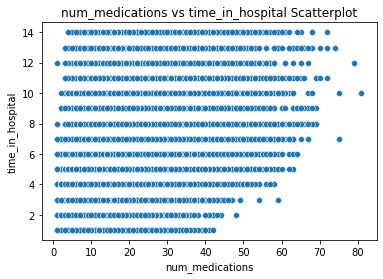

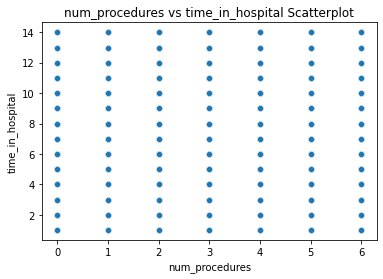

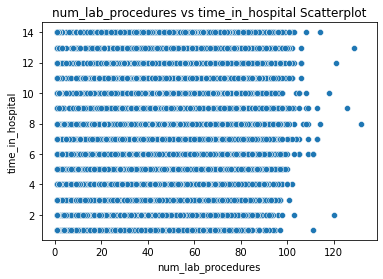

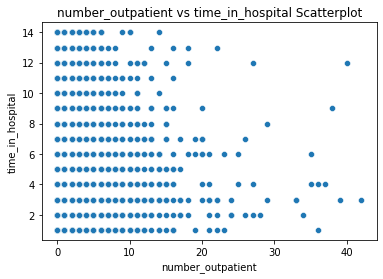

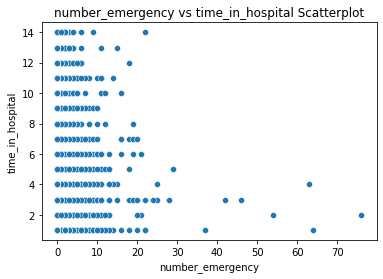

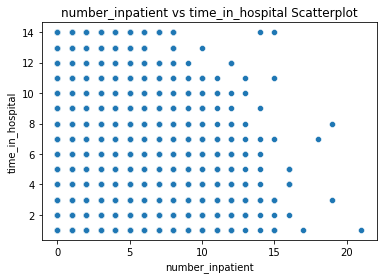

In [29]:
# Assuming 'df' is the DataFrame you want to use
variable_pairs_to_plot = [("num_medications", "time_in_hospital"), 
                          ("num_procedures", "time_in_hospital"), 
                          ("num_lab_procedures", "time_in_hospital"), 
                          ("number_outpatient", "time_in_hospital"), 
                          ("number_emergency", "time_in_hospital"), 
                          ("number_inpatient", "time_in_hospital")]

for x_variable, y_variable in variable_pairs_to_plot:
    sns.scatterplot(x=x_variable, y=y_variable, data=df)
    plt.title(f"{x_variable} vs {y_variable} Scatterplot")
    plt.show()


#### 4. Correlation with target variable:
We can explore the correlation between numerical features and the target variable using boxplots.

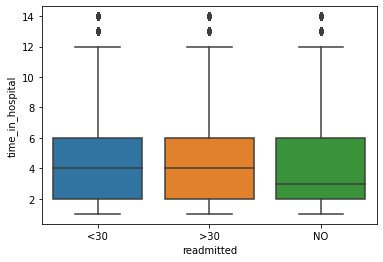

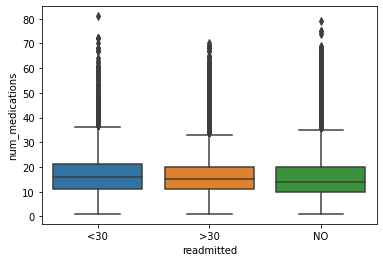

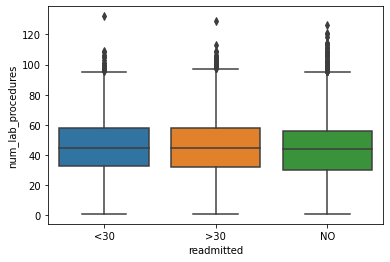

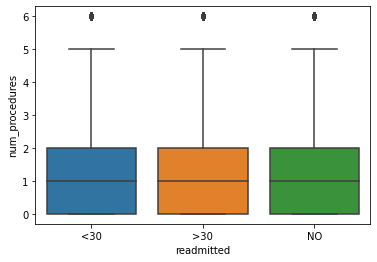

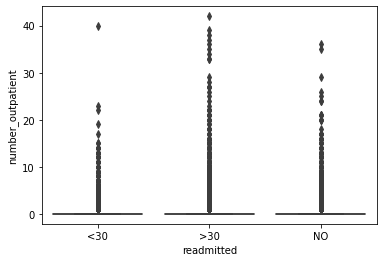

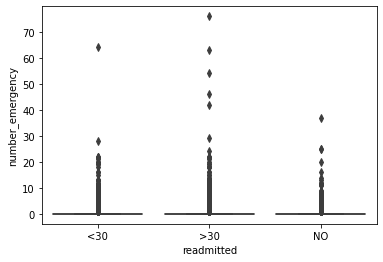

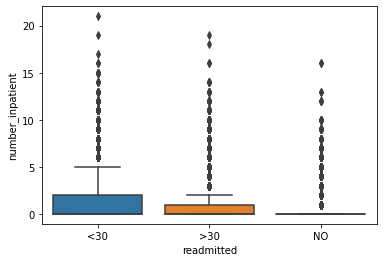

In [30]:
num_cols = ['time_in_hospital', 'num_medications', 'num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']

for col in num_cols:
    sns.boxplot(x="readmitted", y=col, data=df)
    plt.show()


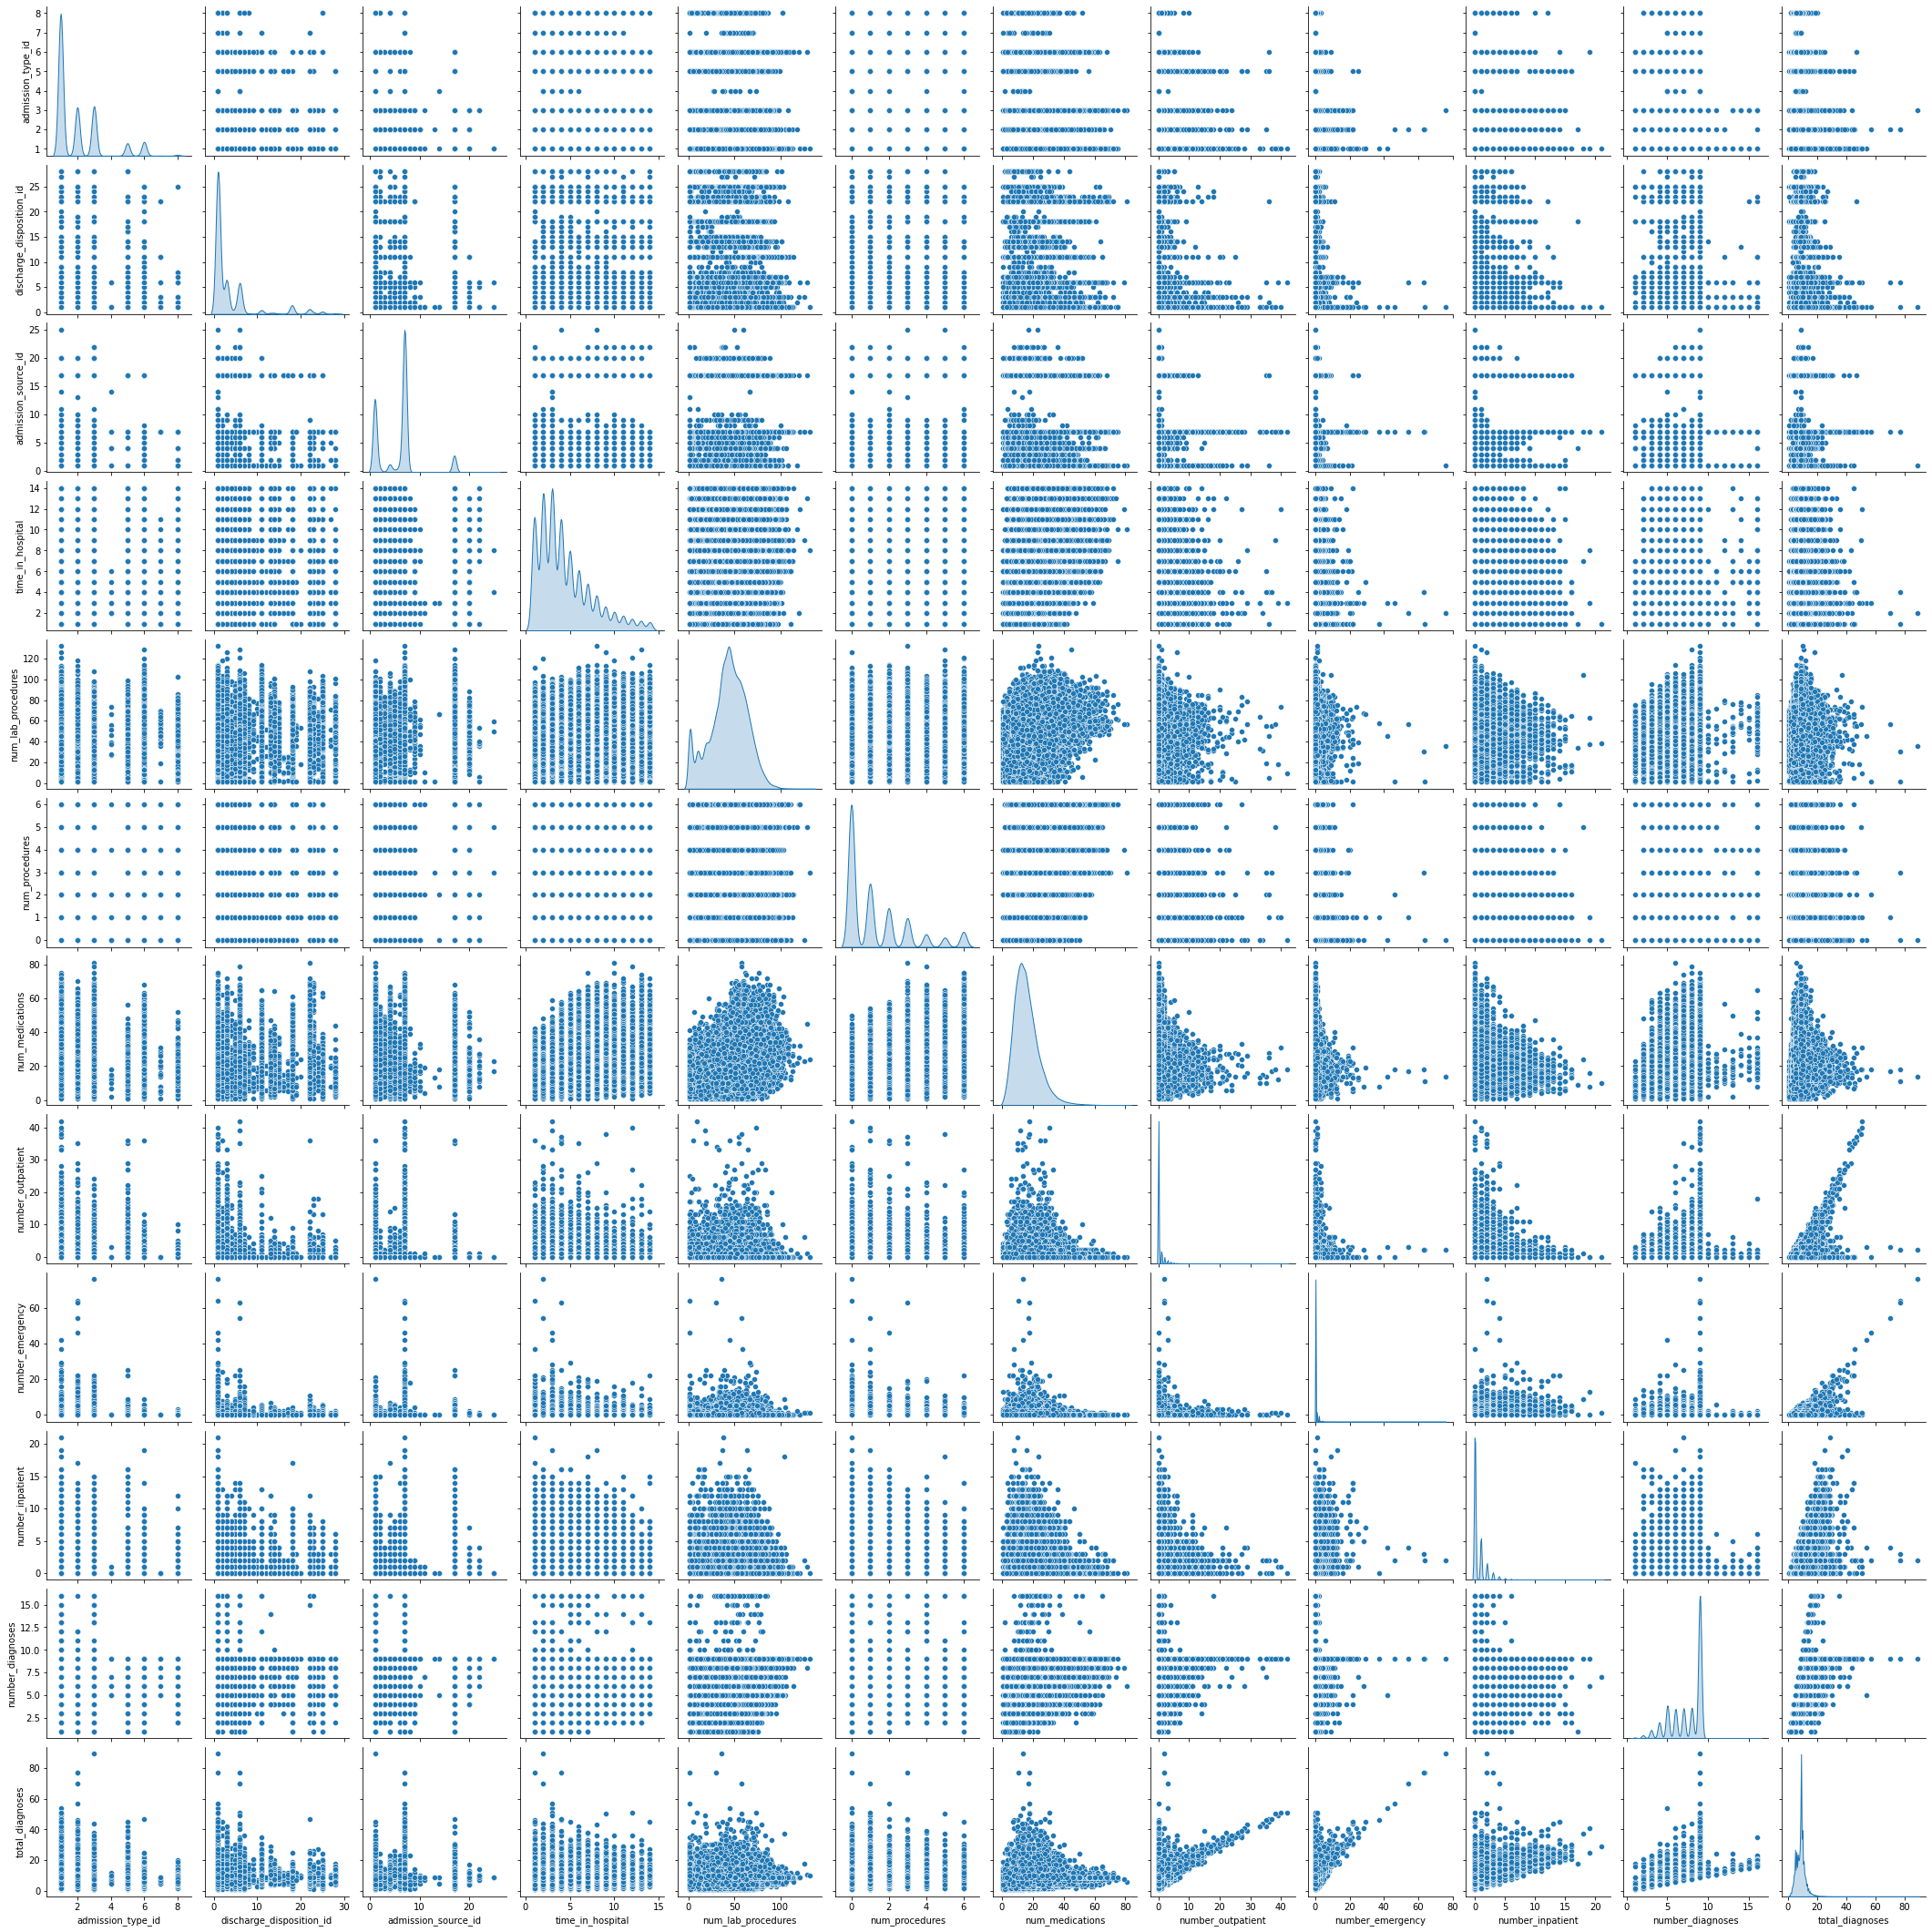

In [24]:
sns.pairplot(df,diag_kind='kde')

#### 5. Imbalanced Target Variable:

We can explore the class distribution of the target variable "readmitted" using a countplot. If the class distribution is highly imbalanced, it can affect the performance of our machine learning models.

<AxesSubplot:xlabel='readmitted', ylabel='count'>

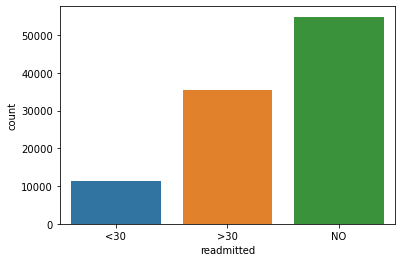

In [31]:
sns.countplot(x="readmitted", data=df)

#### 6. Feature Correlation:

We can explore the correlation between different features in the dataset using a correlation matrix and a heatmap.

<AxesSubplot:>

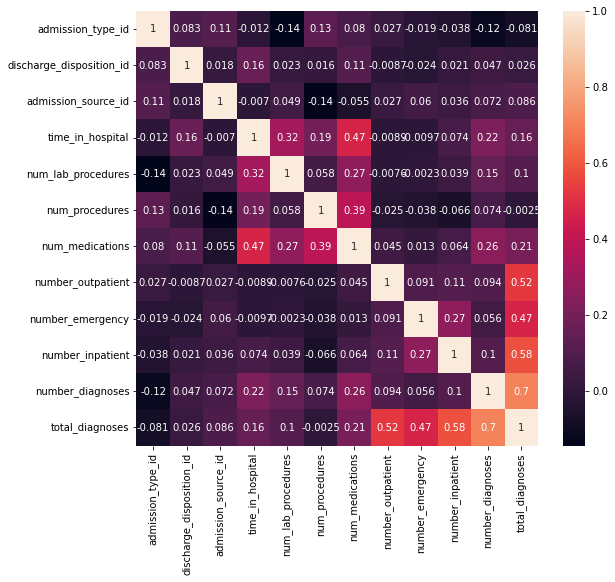

In [32]:
corr_matrix = df.corr()
plt.figure(figsize = (9,8))
sns.heatmap(corr_matrix, annot=True)


This will give us an idea of the correlation between different numerical features in the dataset. It can also help us identify any highly correlated features that may need to be removed to avoid multicollinearity.

#### 7.Missing Values:

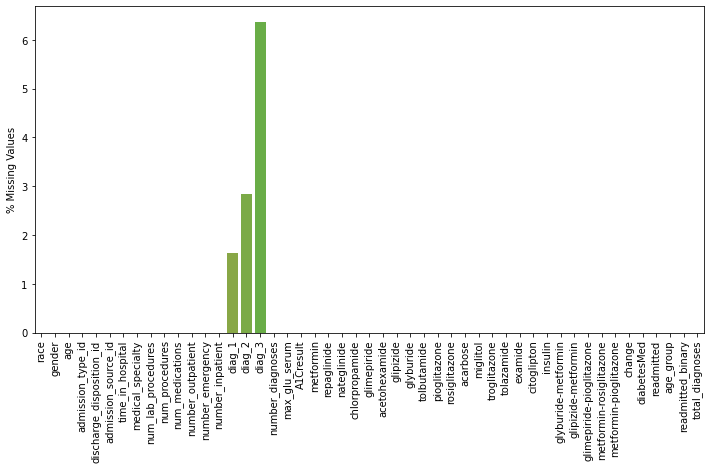

In [33]:
missing_data = df.isnull().sum() / len(df) * 100
plt.figure(figsize=(12, 6)) # set the figure size to 12x6 inches
sns.barplot(x=missing_data.index, y=missing_data)
plt.ylabel('% Missing Values')
plt.xticks(rotation=90)
plt.show()

#### 8. Outliers Detection:
We can detect outliers in numerical features using z-score or IQR method and plot the distribution after removing outliers

In [34]:
#from scipy.stats import zscore
z_scores = zscore(df.select_dtypes(include=np.number))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_filtered = df[filtered_entries]

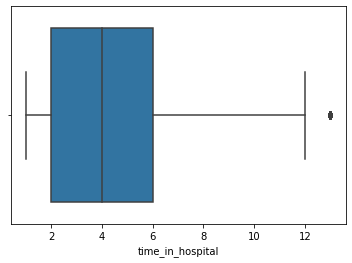

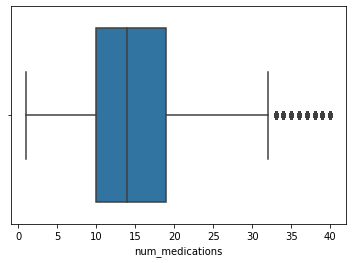

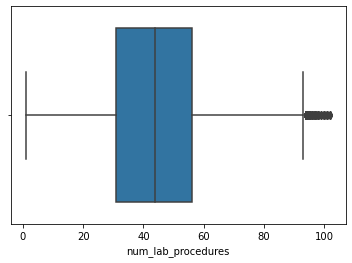

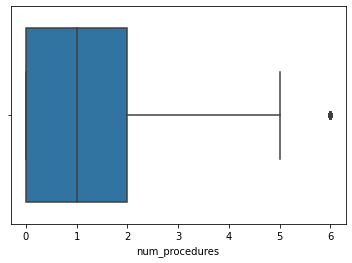

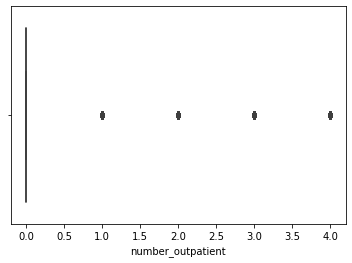

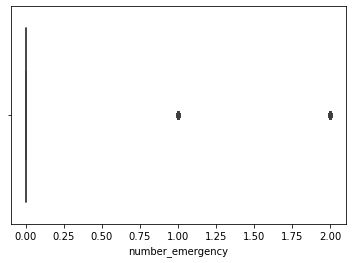

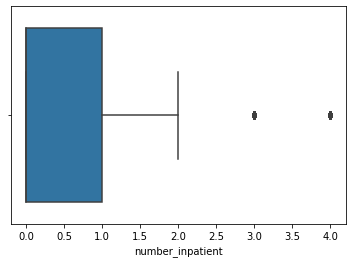

In [29]:
num_cols = ['time_in_hospital', 'num_medications', 'num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']

for col in num_cols:
    sns.boxplot(x=col, data=df_filtered)
    plt.show()


# Statistical Analysis

### Finding Mean, Median & Mode 

In [21]:
df.mean()

admission_type_id            2.024006
discharge_disposition_id     3.715642
admission_source_id          5.754437
time_in_hospital             4.395987
num_lab_procedures          43.095641
num_procedures               1.339730
num_medications             16.021844
number_outpatient            0.369357
number_emergency             0.197836
number_inpatient             0.635566
number_diagnoses             7.422607
readmitted_binary                 inf
total_diagnoses              8.625366
dtype: float64

In [39]:
df.median()

admission_type_id            1.0
discharge_disposition_id     1.0
admission_source_id          7.0
time_in_hospital             4.0
num_lab_procedures          44.0
num_procedures               1.0
num_medications             15.0
number_outpatient            0.0
number_emergency             0.0
number_inpatient             0.0
number_diagnoses             8.0
readmitted_binary            0.0
total_diagnoses              9.0
dtype: float64

In [40]:
df.mode()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,age_group,readmitted_binary,total_diagnoses
0,Caucasian,Female,75.0,1,1,7,3,InternalMedicine,1,0,...,No,No,No,No,No,Yes,NO,Senior,0,9


### Computing the range , variance and standard deviation

In [43]:
num_cols = ['time_in_hospital', 'num_medications', 'num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']
for col in num_cols:
    col_range = df_filtered[col].max() - df_filtered[col].min()
    print(f"Range for {col}: {col_range}")


Range for time_in_hospital: 12
Range for num_medications: 39
Range for num_lab_procedures: 101
Range for num_procedures: 6
Range for number_outpatient: 4
Range for number_emergency: 2
Range for number_inpatient: 4


In [45]:
for col in num_cols:
    col_var = df[col].var()
    print(f"Variance of {col}: {col_var:.2f}")

Variance of time_in_hospital: 8.91
Variance of num_medications: 66.06
Variance of num_lab_procedures: 387.08
Variance of num_procedures: 2.91
Variance of number_outpatient: 1.61
Variance of number_emergency: 0.87
Variance of number_inpatient: 1.59


In [47]:
for col in num_cols:
    col_std = df[col].std()
    print(f"Standard deviation of {col}: {col_std:.2f}")

Standard deviation of time_in_hospital: 2.99
Standard deviation of num_medications: 8.13
Standard deviation of num_lab_procedures: 19.67
Standard deviation of num_procedures: 1.71
Standard deviation of number_outpatient: 1.27
Standard deviation of number_emergency: 0.93
Standard deviation of number_inpatient: 1.26


### mean deviation for the data

In [48]:
for col in num_cols:
    col_mad = df[col].mad()
    print(f"Mean Absolute Deviation of {col}: {col_var:.2f}")

Mean Absolute Deviation of time_in_hospital: 1.59
Mean Absolute Deviation of num_medications: 1.59
Mean Absolute Deviation of num_lab_procedures: 1.59
Mean Absolute Deviation of num_procedures: 1.59
Mean Absolute Deviation of number_outpatient: 1.59
Mean Absolute Deviation of number_emergency: 1.59
Mean Absolute Deviation of number_inpatient: 1.59


### removing any non-numeric values and NaN values from our data 

In [22]:
df = df.dropna()

In [23]:
non_numeric_cols = df.select_dtypes(include='object').columns.tolist()
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


### Calculating the Pearson coefficient of skewness and comment on the skewness of the data

The Pearson coefficient of skewness is a measure of the skewness of a distribution. A value of 0 indicates a symmetric distribution, while a positive value indicates a right-skewed distribution and a negative value indicates a left-skewed distribution.

In [24]:
#from scipy.stats import skew

num_cols = ['time_in_hospital', 'num_medications', 'num_lab_procedures','num_procedures', 'number_outpatient', 'number_emergency', 'number_inpatient']

for col in num_cols:
    skewness = skew(df[col])
    print(f"{col}: {skewness:.2f}")

time_in_hospital: 1.12
num_medications: 1.35
num_lab_procedures: -0.25
num_procedures: 1.29
number_outpatient: 8.94
number_emergency: 23.56
number_inpatient: 3.50


<Figure size 648x576 with 0 Axes>

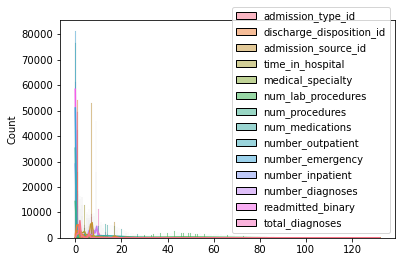

<Figure size 648x576 with 0 Axes>

In [69]:
sns.histplot(data=df,kde=True)
plt.figure(figsize = (9,8))

 A value greater than 0.5 or less than -0.5 indicates a moderately skewed distribution, while a value greater than 1 or less than -1 indicates a highly skewed distribution.

You can comment on the skewness of the data based on these values. For example, if a column has a skewness value of 1.5, it is highly skewed to the right. If a column has a skewness value of -0.8, it is moderately skewed to the left.

### Finding the three quartiles and the interquartile range (IQR).

In [70]:
q1=df.quantile(0.25) #Q1
q2=df.quantile(0.50) #Q2
q3=df.quantile(0.75) #Q3
iqr=q3-q1

In [71]:
q1

admission_type_id            1.0
discharge_disposition_id     1.0
admission_source_id          1.0
time_in_hospital             2.0
medical_specialty            NaN
num_lab_procedures          32.0
num_procedures               0.0
num_medications             11.0
number_outpatient            0.0
number_emergency             0.0
number_inpatient             0.0
number_diagnoses             6.0
readmitted_binary            0.0
total_diagnoses              7.0
Name: 0.25, dtype: float64

In [72]:
q2

admission_type_id            1.0
discharge_disposition_id     1.0
admission_source_id          7.0
time_in_hospital             4.0
medical_specialty            NaN
num_lab_procedures          45.0
num_procedures               1.0
num_medications             15.0
number_outpatient            0.0
number_emergency             0.0
number_inpatient             0.0
number_diagnoses             9.0
readmitted_binary            0.0
total_diagnoses              9.0
Name: 0.5, dtype: float64

In [73]:
q3

admission_type_id            3.0
discharge_disposition_id     3.0
admission_source_id          7.0
time_in_hospital             6.0
medical_specialty            NaN
num_lab_procedures          58.0
num_procedures               2.0
num_medications             20.0
number_outpatient            0.0
number_emergency             0.0
number_inpatient             1.0
number_diagnoses             9.0
readmitted_binary            1.0
total_diagnoses             10.0
Name: 0.75, dtype: float64

In [61]:
iqr

admission_type_id            2.0
discharge_disposition_id     3.0
admission_source_id          6.0
time_in_hospital             4.0
num_lab_procedures          26.0
num_procedures               2.0
num_medications             10.0
number_outpatient            0.0
number_emergency             0.0
number_inpatient             1.0
number_diagnoses             3.0
total_diagnoses              3.0
dtype: float64

### Creating a frequency distribution for the data and visualizing it

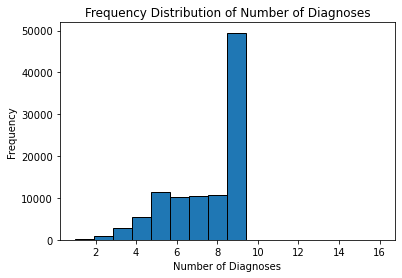

In [14]:
# Create frequency distribution
freq_dist = df['number_diagnoses'].value_counts()

# Sort the values by index (diagnoses count)
freq_dist = freq_dist.sort_index()

# Visualize the frequency distribution as a histogram
plt.hist(df['number_diagnoses'], bins=len(freq_dist), edgecolor='black')

# Add x-axis and y-axis labels and a title
plt.xlabel('Number of Diagnoses')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Number of Diagnoses')

# Show the plot
plt.show()


### Creating a probability distribution of the data and visualizing it

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

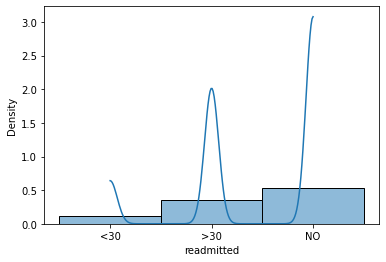

In [28]:
#from scipy.stats import norm

# Create a histogram of the data
sns.histplot(data=df['readmitted'], kde=True, stat="density")

# Fit a normal distribution to the data
mu, std = norm.fit(df['readmitted'])

# Create a range of x-values to plot the normal distribution
x = np.linspace(df['readmitted'].min(), df['readmitted'].max(), 100)

# Calculate the normal distribution values for each x-value
pdf = norm.pdf(x, mu, std)

# Plot the normal distribution
sns.lineplot(x=x, y=pdf, color='r', label='Normal PDF')

# Set the plot title and axis labels
plt.title('Probability Distribution of Readmission')
plt.xlabel('Readmission Time (Days)')
plt.ylabel('Probability Density')

# Show the plot
plt.show()


### Chi-square test

In [49]:
df.dropna(inplace=True)

In [7]:
# create a contingency table
cont_table = pd.crosstab(df['race'], df['readmitted'])

# perform chi-square test
stat, p, dof, expected = chi2_contingency(cont_table)

print(f"Chi-square statistic: {stat}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies: \n", expected)


Chi-square statistic: 282.5948012851926
P-value: 7.379468859169466e-55
Degrees of freedom: 10
Expected frequencies: 
 [[  253.66488808   793.91727099  1225.41784093]
 [ 2143.8198416   6709.70117721 10356.47898119]
 [   71.53506083   223.88956036   345.57537881]
 [ 8492.58438968 26579.98697993 41026.42863039]
 [  227.32748659   711.48679323  1098.18572018]
 [  168.06833324   526.01821827   811.9134485 ]]


In [13]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('readmitted', axis=1)
y = df['readmitted']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)


from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_val)

T-statistic: nan
P-value: nan
